# PATHOverview image creation example

### This notebook briefly details the import, setup and usage of PATHOverview to extract images from a single example slide.

PATHOverview rotates, crops and zooms images to generate customised figures.<br>
PATHOverview requires the packages:<br>
- OpenSlide and openslide-python. 
- pillow, openpyxl, matplotlib, pandas, ipywidgets, ipympl

Virtual slides are accesses using OpenSlide (openslide.org).<br>
Both the OpenSlide main package and openslide-python bindings are required.<br>
Note: For windows users the PATH to openslide\bin must be provided after pathoverview import by setting pathoverview.OPENSLIDE_PATH. OpenSlide is imported using this path when the first slide object is loaded. This is not requred on unix systems.

This example uses a freely available ndpi slide from OpenSlide: https://openslide.cs.cmu.edu/download/openslide-testdata/Hamamatsu/. OS-1.ndpi should be downloaded and placed in the test_files directory.

Slides are loaded as pathoverview.slide_obj objects with the following parameters to modify output:
- .rot = rotation of the slide in degrees.
- .mirror = True/False to flip the image.
- .zoom_point = tuple of the point on the slide to centre zoom image on. coordinates are given relative to the unrotated uncropped slide size. <br>
ie. (0.5,0.5) is the centre of the slide.
- .crop = tuple containing coordinates of centre of the crop ROI (as .zoom_point), crop width relative to unrotated slide width, crop height relative to unrotated slide height. <br>
ie. ((0.5,0.5), 0.75, 0.75) will give a ROI centred on the slide centre with width and height 0.75x that of the slide

The functions available to extract images from a slide are outlined below.

An interactive method for setting these parameters and creating multi-panel figures is provided in [pathoverview_interactive_example.ipynb](pathoverview_interactive_example.ipynb).

In [1]:
# set matplotlib to use inline backend for nice figure display behaviour
%matplotlib inline

# import the pathoverview module and:
# slide_obj: a python object 
# pathofigure: a class wrapper containing the function to generate figures 
#              from a dataframe containing slide details
import pathoverview
from pathoverview import slide_obj

# The python builtin Path is used to handle filepaths nicely between windows and mac
from pathlib import Path

# Pandas handles excel sheet <-> data frame data handling
import pandas as pd

In [2]:
# On windows the path to your OpenSlide binaries must be defined before first slide_obj creation
# This is not requred/used on mac
pathoverview.OPENSLIDE_PATH = r'C:\openslide\bin'

In [3]:
test_file = r"./test_files/OS-1.ndpi"
# slide_obj runs the filename through Path to ensure correct Win/Mac handling
my_slide = slide_obj(test_file, rotation=70)

Help on function get_macro_image in module pathoverview:

get_macro_image(self, max_size=500)
    Return PIL.Image containing the macro slide image thumbnailed to max_size
    if available else a 2x2 blank image.



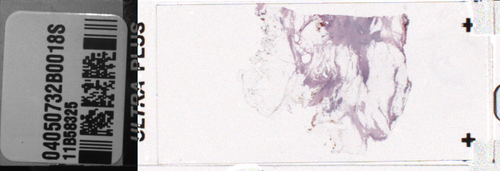

In [4]:
help(slide_obj.get_macro_image)

my_slide.get_macro_image()

Help on function get_label_image in module pathoverview:

get_label_image(self, max_size=500, rotated=True)
    Returns a PIL.Image of macro slide image cropped to a square containing the label



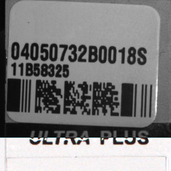

In [5]:
help(slide_obj.get_label_image)

my_slide.get_label_image()

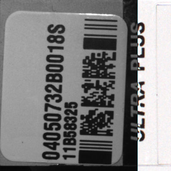

In [6]:
my_slide.get_label_image(rotated=False)

Help on function get_summary_figure in module pathoverview:

get_summary_figure(self, width=500)
    Returns an image containing the slide macro image and raw_overview.

test_files\OS-1.ndpi


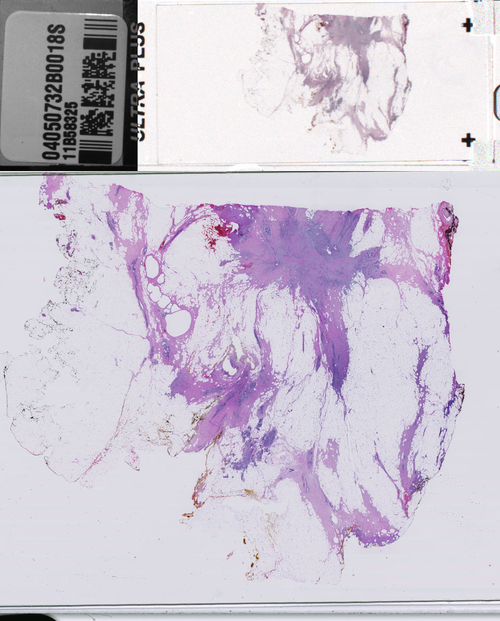

In [7]:
help(slide_obj.get_summary_figure)

print(my_slide.filename)
my_slide.get_summary_figure()

Help on function get_raw_overview_image in module pathoverview:

get_raw_overview_image(self, image_size=(500, 500), sb=None)
    Return a PIL.Image containing an RGBA thumbnail of the slide.
    Rotations and crop are not applied.
    size:     overall dimensions of the image.
    sb:       size of scalebar in um.



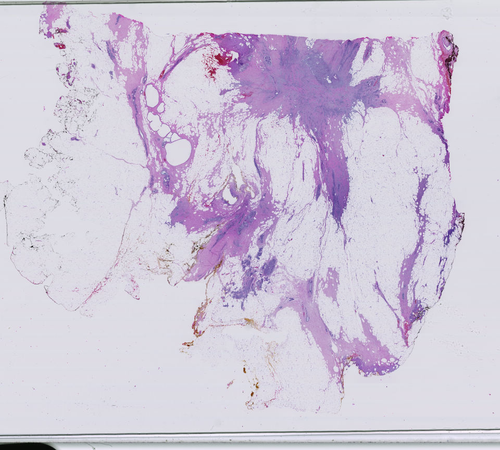

In [8]:
help(slide_obj.get_raw_overview_image)


my_slide.get_raw_overview_image()

Help on function get_focus_check in module pathoverview:

get_focus_check(self, size=900, num_img=(9, 9), level=0)
    An experimental function to return an image of num_image tiles
    evenly spaced across the specified level. Could be used to spot out 
    of focus regions.



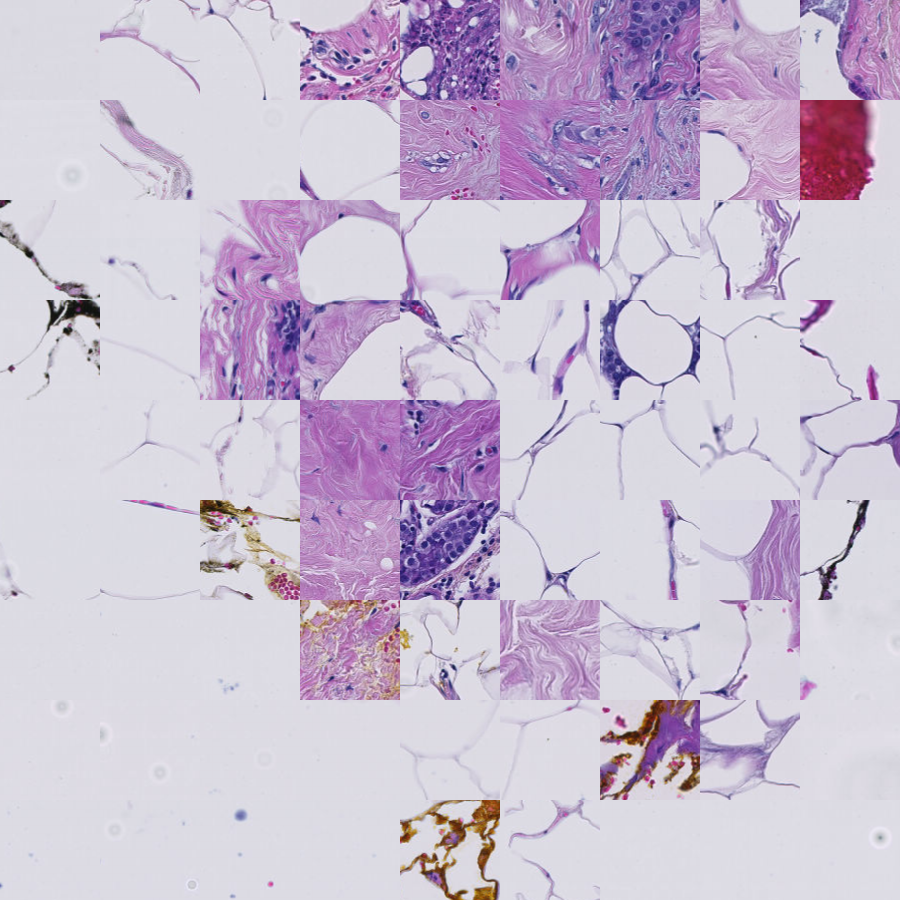

In [9]:
help(slide_obj.get_focus_check)

my_slide.get_focus_check(level=2)

Help on function get_zoom_image in module pathoverview:

get_zoom_image(self, image_size, true_width, zoom_point=None, rot=None, mirror=None, **kwargs)
    Returns a PIL.Image



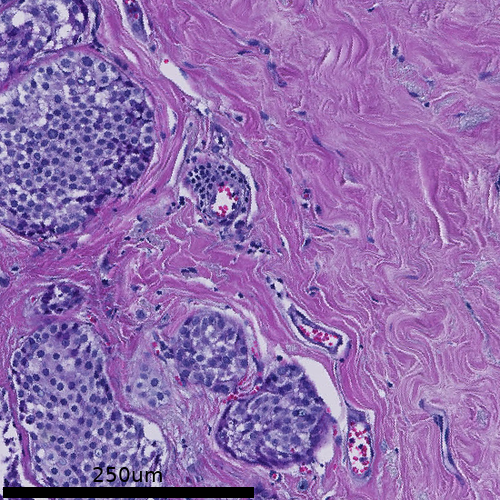

In [10]:
help(slide_obj.get_zoom_image)


my_slide.get_zoom_image((500,500),500, sb_len = 250, sb_label=True)

Help on function get_crop_image in module pathoverview:

get_crop_image(self, image_size, rot=None, mirror=None, crop=None, **kwargs)
    Returns PIL.Image of cropped and rotated ROI from slide
    required:
    image_size
    if other parameters are None, the slide_obj properties are used.



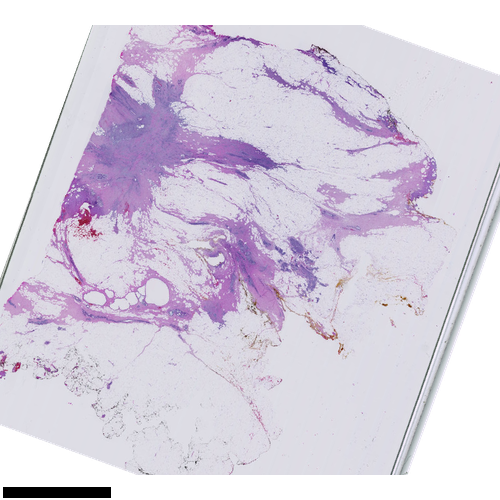

In [11]:
help(slide_obj.get_crop_image)


my_slide.get_crop_image((500,500), sb_len = "auto")

Help on function get_figure in module pathoverview:

get_figure(self, image_size=(500, 500), add_inset=True, inset_size=None, zoomed_true=250, rot=None, mirror=None, zoom_point=None, crop=None, sb_len=None, inset_sb_len=None, **kwargs)
    Returns PIL.Image containing cropped overview image with inset zoom image (add_inset = True).
    If parameters are None, slide_obj parameters are used.



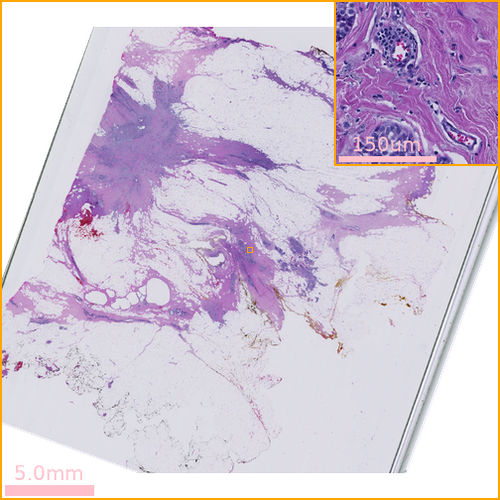

In [12]:
help(slide_obj.get_figure)


my_slide.get_figure(sb_len=5000, sb_label = True, inset_sb_len = 150, sb_color="pink", b_color = "orange")

Help on function get_figure_inverted in module pathoverview:

get_figure_inverted(self, image_size=(500, 500), add_inset=True, inset_size=None, zoomed_true=250, rot=None, mirror=None, zoom_point=None, crop=None, sb_len=None, inset_sb_len=None, **kwargs)
    Returns PIL.Image containing cropped overview image with inset zoom image (add_inset = True).
    If parameters are None, slide_obj parameters are used.



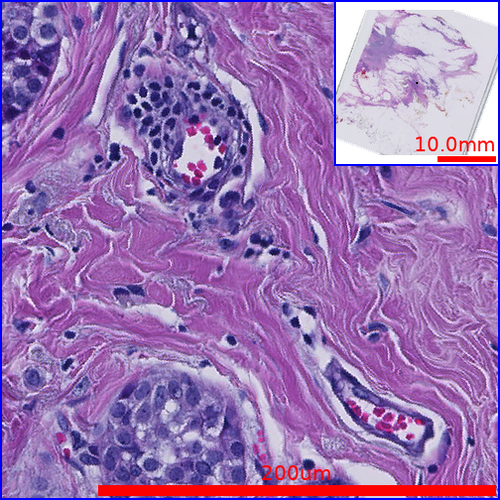

In [14]:
help(slide_obj.get_figure_inverted)


my_slide.get_figure_inverted(sb_len=200, sb_label = True, inset_sb_len = 10000, sb_color="red", b_color = "blue",
                             sb_position = "r")

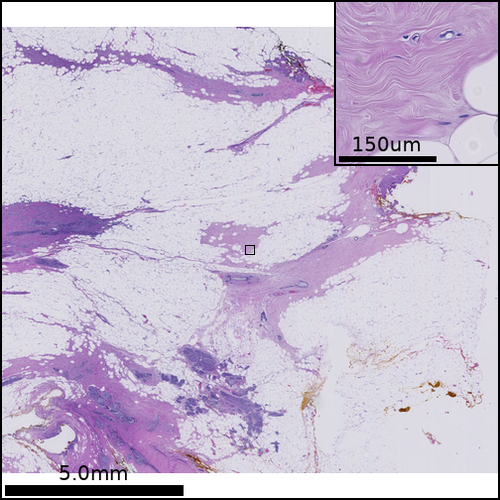

In [19]:
# An example of generating and saving a figure
fig_out = my_slide.get_figure(rot = 90, zoom_point = (0.65,0.65), crop = ((0.65,0.65),0.5,0.5),
                             zoom_true = 1000, sb_len=5000, inset_sb_len = 150, sb_label = True)
fig_out.save(Path(r".\test_files\test_image.png"))
display(fig_out)

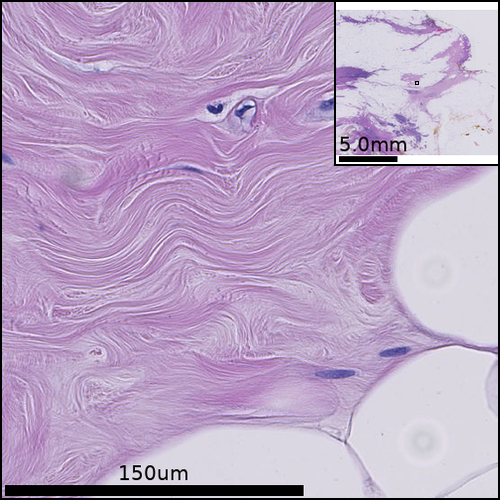

In [22]:
# An example of generating and saving a figure
fig_out = my_slide.get_figure_inverted(rot = 90, zoom_point = (0.65,0.65), crop = ((0.65,0.65),0.5,0.5),
                             zoom_true = 1000, sb_len=150, inset_sb_len = 5000, sb_label = True)
fig_out.save(Path(r".\test_files\test_image_inverted.png"))
display(fig_out)